In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd #data processing

import os
import re
import nltk

In [2]:
train=pd.read_csv('./fake-news-data/train.csv')
test=pd.read_csv('./fake-news-data/test.csv')

In [3]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


In [4]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
************
id          0
title     122
author    503
text        7
dtype: int64


In [5]:
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+test['text']
train['total']=train['title']+' '+train['author']+train['text']

# Creating Wordcloud Visuals

In [7]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in train[train['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

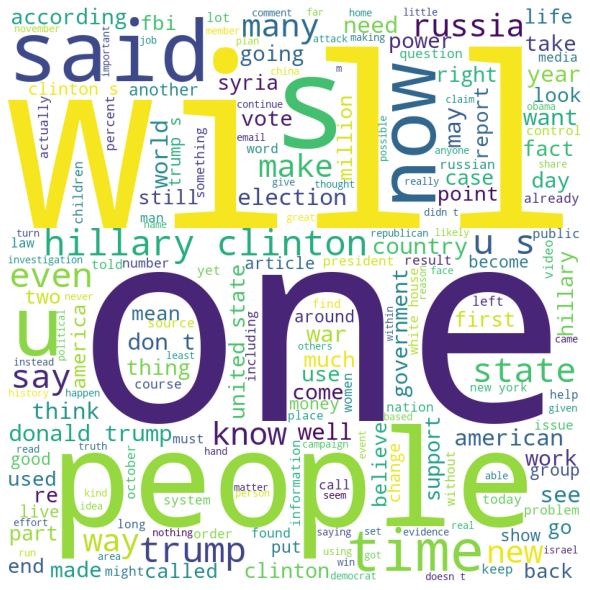

In [8]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Cleaning and preprocessing 

# 1. Regex

In [6]:
#Remove punctuations from the String  
s = "!</> hello please$$ </>^s!!!u%%bs&&%$cri@@@be^^^&&!& </>*to@# the&&\ cha@@@n##%^^&nel!@# %%$"

In [7]:
s = re.sub(r'[^\w\s]','',s)

In [8]:
print(s)

 hello please subscribe to the channel 


# 2. Tokenization

In [9]:
#Downloading nltk data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
nltk.word_tokenize("Hello how are you")

['Hello', 'how', 'are', 'you']

# 3. StopWords

In [11]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
sentence = "Covid-19 pandemic has impacted many countries and what it did to economy is very stressful"

In [13]:
words = nltk.word_tokenize(sentence)
words = [w for w in words if w not in stop_words]

In [14]:
words

['Covid-19',
 'pandemic',
 'impacted',
 'many',
 'countries',
 'economy',
 'stressful']

# 4. Lemmatization

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

input_str="been had done languages cities mice"

In [16]:
#Tokenize the sentence
input_str=nltk.word_tokenize(input_str)

#Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word))

been
had
done
language
city
mouse


# Let's Apply

In [17]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence


In [18]:
train = train[['total','label']]

# Applying NLP Techniques

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
X_train = train['total']
Y_train = train['label']

# Bag-of-words / CountVectorizer

In [21]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [22]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# TF-iDF Vectorizer

In [23]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [24]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30)

In [25]:
tfidf_features

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

# Let's Apply

In [26]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [27]:
tf_idf_matrix

<20800x220387 sparse matrix of type '<class 'numpy.float64'>'
	with 5987666 stored elements in Compressed Sparse Row format>

# Modelling

In [28]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(y_test, pred)
cm

Accuracy of Lasso classifier on training set: 1.00
Accuracy of Lasso classifier on test set: 0.98


array([[2493,   71],
       [  44, 2592]], dtype=int64)

# MultinomialNB

In [30]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.88
Accuracy of NB classifier on test set: 0.83


array([[2558,    6],
       [ 853, 1783]], dtype=int64)

# Pipeline

In [31]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['total']
Y_train = train['label']

In [32]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [34]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [35]:
pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

array([0], dtype=int64)

In [36]:
#saving the pipeline
filename = 'pipeline1.sav'
joblib.dump(pipeline, filename)

['pipeline1.sav']

In [37]:
filename = './pipeline1.sav'

# Prediction

In [38]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["Andrea Tantaros, a former Fox News host, charged in a lawsuit filed Monday that top executives at the network, including the man who replaced Roger Ailes, punished her for complaining about sexual harassment by Mr. Ailes. The suit by Ms. Tantaros, filed in New York State Supreme Court in Manhattan, is the latest round in a contentious volley that began in late winter, when Fox claimed she had breached her employment contract by writing a book without receiving network approval. â€œFox News masquerades as a defender of traditional family values, but behind the scenes, it operates like a   Playboy   cult, steeped in intimidation, indecency and misogyny,â€ Ms. Tantarosâ€™s suit says. Fox News said it would not comment on pending litigation. Mr. Ailes, the networkâ€™s founding chairman and guiding force for two decades, resigned last month after a former anchor, Gretchen Carlson, said in a suit that she was fired for refusing his sexual advances. Mr. Ailes has denied all allegations of harassment. In April, the chief lawyer for Fox charged that Ms. Tantaros had concocted sexual harassment claims to gain leverage in the contract dispute her lawyer, Judd Burstein, said the book dispute was a pretext that Fox was using to silence her. During arbitration, Mr. Burstein said, Fox News offered to pay her a sum â€œin the seven figuresâ€ if she renounced claims against Mr. Ailes and others at the network, including the host Bill Oâ€™Reilly. According to the lawsuit, Ms. Tantaros said she had been subjected to unwelcome advances from Mr. Oâ€™Reilly, whom she had regarded as a friend and adviser. â€œAiles did not act alone,â€ the lawsuit states. â€œHe may have been the primary culprit, but his actions were condoned by his most senior lieutenants, who engaged in a concerted effort to silence Tantaros by threats, humiliation and retaliation. â€ Ms. Tantaros also claimed in the lawsuit that she was the subject of humiliating posts by pseudonymous accounts on Twitter known as â€œsock puppetsâ€ that she says were instigated by the Fox News publicity department. Ms. Tantaros joined Fox as a contributor in 2010, and a year later was named   of â€œThe Five,â€ which aired at 5 p. m. She said in the suit that she was repeatedly told by Fox executives that she could not wear pants on the air because â€œRoger wants to see your legs. â€ The lawsuit goes on to say that on Aug. 12, 2014, Mr. Ailes called her into his office and asked if she was planning to marry and have children. â€œAiles then started complaining about marriage in general, and also made   jokes about being married,â€ the lawsuit states. It describes Mr. Ailes as speculating on the sexual habits and preferences of 10 Fox News personalities. He asked Ms. Tantaros to turn around â€œso I can get a good look at you,â€ the lawsuit charges, adding that Ms. Tantaros refused. Soon after, she was moved from â€œThe Fiveâ€ to a   show, â€œOutnumbered,â€ that aired at midday. Mr. Ailes called her back for similar sessions in December 2014 and February 2015, the lawsuit charges, and when she continued to rebuff him, she encountered hostility from the Fox News publicity department. In the February meeting, she said, Mr. Ailes talked about how she would look in a bikini, and accused her of ending a   relationship because she had been merely using the man. The episode brought her to tears, the lawsuit states. She said the sole interview arranged by the publicity department during that period was with a writer for a blog controlled by Fox, who asked about her breasts and if she was difficult to work with. In April 2015, the lawsuit states, Ms. Tantaros met with Bill Shine, then a senior news executive and close aide to Mr. Ailes. She said that she told him about the meetings with Mr. Ailes and asked if he had told the head of publicity for Fox News, Irena Briganti, to go after her. The lawsuit claims that Mr. Shine â€œtold Tantaros that Briganti is like a rabid dog on a chain that we canâ€™t control. Sometimes that dog gets off the chain. â€ Then, pointing to a picture of Mr. Ailes on a magazine cover, the lawsuit charges, Mr. Shine told her that â€œthis powerful man has faith in Irena Brigantiâ€ and that Ms. Tantaros â€œneeds to let this one go. â€ Mr. Shine, through a spokeswoman, has said that Ms. Tantaros never approached him about Mr. Ailes harassing her. Mr. Shine was named   of Fox News after Mr. Ailes departed.
"])
print(result) 

[0]
